# qecsim demos

## Plotting logical failure rate as a function of physical error rate for planar stabilizer codes
This demo shows how to plot statistics on many error correction simulation runs, see figure for more details.

The code makes use of `qecsim.app.run(code, error_model, decoder, error_probability, max_runs, max_failures)`.

### Initialise run parameters

In [33]:
%matplotlib inline
import collections
import itertools
import numpy as np
import matplotlib.pyplot as plt
from qecsim import app
from qecsim.models.generic import PhaseFlipErrorModel
from qecsim.models.planar import PlanarCode, PlanarMPSDecoder

# set models
codes = [PlanarCode(*size) for size in [(3, 3), (5, 5),(7,7)]]
error_model = PhaseFlipErrorModel()
decoder = PlanarMPSDecoder()
# set physical error probabilities
error_probability_min, error_probability_max = 0, 0.4

error_probabilities = np.linspace(error_probability_min, error_probability_max, 20)
# set max_runs for each probability
max_runs = 10

# print run parameters
print('Codes:', [code.label for code in codes])
print('Error model:', error_model.label)
print('Decoder:', decoder.label)
print('Error probabilities:', error_probabilities)
print('Maximum runs:', max_runs)

Codes: ['Planar 3x3', 'Planar 5x5', 'Planar 7x7']
Error model: Phase-flip
Decoder: Planar MPS (mode=c)
Error probabilities: [0.         0.02105263 0.04210526 0.06315789 0.08421053 0.10526316
 0.12631579 0.14736842 0.16842105 0.18947368 0.21052632 0.23157895
 0.25263158 0.27368421 0.29473684 0.31578947 0.33684211 0.35789474
 0.37894737 0.4       ]
Maximum runs: 400


### Run simulations

In [32]:
import multiprocessing as mp
from functools import partial

def parallel_step_p(code, error_model, decoder, max_runs,error_probability):
    results= app.run(code, error_model, decoder, error_probability, max_runs=100)
    return results['logical_failure_rate']

pL_list =np.zeros((len(codes),len(error_probabilities)))
std_list=np.zeros((len(codes),len(error_probabilities)))

for code_index,code in enumerate(codes):
    p=mp.Pool()
    func=partial(parallel_step_p,code, error_model, decoder, max_runs)
    pL_list[code_index]=p.map(func, error_probabilities)
    p.close()
    p.join()
    
pL_list

Process ForkPoolWorker-137:


KeyboardInterrupt: 

Process ForkPoolWorker-139:
Process ForkPoolWorker-138:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **s

  File "/opt/sagemath-9.2/local/lib/python3.7/site-packages/qecsim/tensortools/mps.py", line 98, in _contract
    return np.einsum('nesw,NESe->nNEsSw', le, ri).reshape(
  File "<__array_function__ internals>", line 6, in einsum
  File "/opt/sagemath-9.2/local/lib/python3.7/site-packages/qecsim/tensortools/mps.py", line 103, in <listcomp>
    return [_contract(le, ri) for le, ri in zip(left_mps, right_mps)]
  File "/opt/sagemath-9.2/local/lib/python3.7/site-packages/qecsim/tensortools/mps.py", line 98, in _contract
    return np.einsum('nesw,NESe->nNEsSw', le, ri).reshape(
  File "<__array_function__ internals>", line 6, in einsum
  File "/opt/sagemath-9.2/local/lib/python3.7/site-packages/numpy/core/einsumfunc.py", line 1350, in einsum
    return c_einsum(*operands, **kwargs)
  File "/opt/sagemath-9.2/local/lib/python3.7/site-packages/qecsim/tensortools/mps.py", line 98, in _contract
    return np.einsum('nesw,NESe->nNEsSw', le, ri).reshape(
  File "<__array_function__ internals>", lin

In [56]:
%matplotlib inline
import collections
import itertools
import numpy as np
from qecsim import paulitools as pt
import matplotlib.pyplot as plt
from qecsim import app
from qecsim.models.generic import PhaseFlipErrorModel,DepolarizingErrorModel
from qecsim.models.planar import PlanarCode, PlanarMPSDecoder
from _planarmpsdecoder_def import PlanarMPSDecoder_def
import app_def
import importlib as imp
imp.reload(app_def)

# set models
codes = [PlanarCode(*size) for size in [(5,5),(7,7)]]
error_model = DepolarizingErrorModel()
decoder = PlanarMPSDecoder_def()
# set physical error probabilities
error_probability_min, error_probability_max = 0, 0.6
error_probabilities = np.linspace(error_probability_min, error_probability_max, 4)

# set max_runs for each probability
max_runs = 60

# print run parameters
print('Codes:', [code.label for code in codes])
print('Error model:', error_model.label)
print('Decoder:', decoder.label)
print('Error probabilities:', error_probabilities)
print('Maximum runs:', max_runs)

import multiprocessing as mp
from functools import partial

def parallel_step_p(code,hadamard_mat,error_model, decoder, max_runs,error_probability):
    results= app_def.run_def(code,hadamard_mat, error_model, decoder, error_probability, max_runs=100)
    return results

pL_list =np.zeros((len(codes),len(error_probabilities)))
std_list=np.zeros((len(codes),len(error_probabilities)))

for code_index,code in enumerate(codes):
     #hadamard_mat_XZZX
    rng = np.random.default_rng(59)
    error = error_model.generate(code, error_probability_max, rng)
    syndrome = pt.bsp(error, code.stabilizers.T)
    sample_pauli = decoder.sample_recovery(code, syndrome)
    hadamard_mat=np.zeros((2*sample_pauli.code.size[0] - 1, 2*sample_pauli.code.size[1] - 1))
    hadamard_mat_XZZX=hadamard_mat
    for row, col in np.ndindex(hadamard_mat_XZZX.shape):
        if row%2==0 and col%2==0:
                hadamard_mat_XZZX[row,col]=1

    pH=0.5  
    hadamard_mat_rand=hadamard_mat
    for row, col in np.ndindex(hadamard_mat_rand.shape):
        if ((row%2==0 and col%2==0) or (row%2==1 and col%2==1)):
            if(np.random.rand(1,1))<pH:
                hadamard_mat_rand[row,col]=1
            
    p=mp.Pool()
    func=partial(parallel_step_p,code,hadamard_mat_rand, error_model, decoder, max_runs)
    pL_list[code_index]=p.map(func, error_probabilities)
    p.close()
    p.join()
    
pL_list

Codes: ['Planar 5x5', 'Planar 7x7']
Error model: Depolarizing
Decoder: Planar MPS (mode=c)
Error probabilities: [0.  0.2 0.4 0.6]
Maximum runs: 60


MaybeEncodingError: Error sending result: '<multiprocessing.pool.ExceptionWithTraceback object at 0x6ffe1b035a10>'. Reason: 'PicklingError("Can't pickle <class 'MemoryError'>: it's not the same object as builtins.MemoryError")'

Process ForkPoolWorker-263:
Process ForkPoolWorker-262:
Process ForkPoolWorker-260:
Process ForkPoolWorker-261:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/l

In [58]:
PlanarCode(*(5,5))

PlanarCode(5, 5)

In [84]:
%matplotlib inline
import collections
import itertools
import numpy as np
from qecsim import paulitools as pt
import matplotlib.pyplot as plt
from qecsim import app
from qecsim.models.generic import DepolarizingErrorModel
from qecsim.models.planar import PlanarCode, PlanarMPSDecoder
from _planarmpsdecoder_def import PlanarMPSDecoder_def
import app_def
import importlib as imp
imp.reload(app_def)
from qecsim import app
imp.reload(app)

# set models
codes = [PlanarCode(*size) for size in [(7,7)]]
error_model = DepolarizingErrorModel()
decoder = PlanarMPSDecoder(chi=8)
# set physical error probabilities
error_probability_min, error_probability_max = 0, 0.6
error_probabilities = np.linspace(error_probability_min, error_probability_max, 12)

      
# set max_runs for each probability
max_runs = 10

# print run parameters
print('Codes:', [code.label for code in codes])
print('Error model:', error_model.label)
print('Decoder:', decoder.label)
print('Error probabilities:', error_probabilities)
print('Maximum runs:', max_runs)

import multiprocessing as mp
from functools import partial

def parallel_step_p(code,hadamard_mat,error_model, decoder, max_runs,error_probability):
    results= app.run(code, error_model, decoder, error_probability, max_runs=100)
    result=results['logical_failure_rate']
  # result= app_def.run_def(code, hadamard_mat,error_model, decoder, error_probability, max_runs=100)
    return result

pL_list =np.zeros((len(codes),len(error_probabilities)))
std_list=np.zeros((len(codes),len(error_probabilities)))

for code_index,code in enumerate(codes):
     #hadamard_mat_XZZX
    rng = np.random.default_rng(59)
    error_model = DepolarizingErrorModel()
    error = error_model.generate(code, error_probability_max, rng)
    syndrome = pt.bsp(error, code.stabilizers.T)
    sample_pauli = decoder.sample_recovery(code, syndrome)
    hadamard_mat=np.zeros((2*sample_pauli.code.size[0] - 1, 2*sample_pauli.code.size[1] - 1))
    hadamard_mat_XZZX=hadamard_mat
    for row, col in np.ndindex(hadamard_mat_XZZX.shape):
        if row%2==0 and col%2==0:
                hadamard_mat_XZZX[row,col]=1

    pH=0.5  
    hadamard_mat_rand=hadamard_mat
    for row, col in np.ndindex(hadamard_mat_rand.shape):
        if ((row%2==0 and col%2==0) or (row%2==1 and col%2==1)):
            if(np.random.rand(1,1))<pH:
                hadamard_mat_rand[row,col]=1
                
                
    p=mp.Pool()
    func=partial(parallel_step_p,code,hadamard_mat, error_model, decoder, max_runs)
    pL_list_code=p.map(func, error_probabilities)
    p.close()
    p.join()
    pL_list[code_index]=pL_list_code #trying to avoid pickling errors this way? 
    
print(pL_list)

Codes: ['Planar 7x7']
Error model: Depolarizing
Decoder: Planar MPS (chi=8, mode=c)
Error probabilities: [0.         0.05454545 0.10909091 0.16363636 0.21818182 0.27272727
 0.32727273 0.38181818 0.43636364 0.49090909 0.54545455 0.6       ]
Maximum runs: 10
[[0.   0.   0.01 0.23 0.42 0.58 0.72 0.69 0.77 0.78 0.69 0.76]]


In [85]:
%matplotlib inline
import collections
import itertools
import numpy as np
from qecsim import paulitools as pt
import matplotlib.pyplot as plt
from qecsim import app
from qecsim.models.generic import DepolarizingErrorModel
from qecsim.models.planar import PlanarCode, PlanarMPSDecoder
from _planarmpsdecoder_def import PlanarMPSDecoder_def
import app_def
import importlib as imp
imp.reload(app_def)
from qecsim import app
imp.reload(app)

# set models
codes = [PlanarCode(*size) for size in [(7,7)]]
error_model = DepolarizingErrorModel()
decoder = PlanarMPSDecoder_def(chi=8)
# set physical error probabilities
error_probability_min, error_probability_max = 0, 0.6
error_probabilities = np.linspace(error_probability_min, error_probability_max, 12)

      
# set max_runs for each probability
max_runs = 10

# print run parameters
print('Codes:', [code.label for code in codes])
print('Error model:', error_model.label)
print('Decoder:', decoder.label)
print('Error probabilities:', error_probabilities)
print('Maximum runs:', max_runs)

import multiprocessing as mp
from functools import partial

def parallel_step_p(code,hadamard_mat,error_model, decoder, max_runs,error_probability):
    #result= app.run(code, error_model, decoder, error_probability, max_runs=100)
    result= app_def.run_def(code, hadamard_mat,error_model, decoder, error_probability, max_runs=100)
    return result

pL_list =np.zeros((len(codes),len(error_probabilities)))
std_list=np.zeros((len(codes),len(error_probabilities)))

for code_index,code in enumerate(codes):
     #hadamard_mat_XZZX
    rng = np.random.default_rng(59)
    error_model = DepolarizingErrorModel()
    error = error_model.generate(code, error_probability_max, rng)
    syndrome = pt.bsp(error, code.stabilizers.T)
    sample_pauli = decoder.sample_recovery(code, syndrome)
    hadamard_mat=np.zeros((2*sample_pauli.code.size[0] - 1, 2*sample_pauli.code.size[1] - 1))
    hadamard_mat_XZZX=hadamard_mat
    for row, col in np.ndindex(hadamard_mat_XZZX.shape):
        if row%2==0 and col%2==0:
                hadamard_mat_XZZX[row,col]=1

    pH=0.5  
    hadamard_mat_rand=hadamard_mat
    for row, col in np.ndindex(hadamard_mat_rand.shape):
        if ((row%2==0 and col%2==0) or (row%2==1 and col%2==1)):
            if(np.random.rand(1,1))<pH:
                hadamard_mat_rand[row,col]=1
                
    hadamard_mat_optimal=hadamard_mat
    for row, col in np.ndindex(hadamard_mat_optimal.shape):
        if ((row%2==0 and col%2==0) or (row%2==1 and col%2==1)):
            if(np.random.rand(1,1))<pH:
                hadamard_mat_optimal[row,col]=1
                
    p=mp.Pool()
    func=partial(parallel_step_p,code,hadamard_mat_rand, error_model, decoder, max_runs)
    pL_list_code=p.map(func, error_probabilities)
    p.close()
    p.join()
    pL_list[code_index]=pL_list_code #trying to avoid pickling errors this way? 
    
print(pL_list)

Codes: ['Planar 7x7']
Error model: Depolarizing
Decoder: Planar MPS (chi=8, mode=c)
Error probabilities: [0.         0.05454545 0.10909091 0.16363636 0.21818182 0.27272727
 0.32727273 0.38181818 0.43636364 0.49090909 0.54545455 0.6       ]
Maximum runs: 10
[[0.   0.   0.02 0.14 0.38 0.66 0.69 0.75 0.72 0.75 0.8  0.77]]


In [86]:
%matplotlib inline
import collections
import itertools
import numpy as np
from qecsim import paulitools as pt
import matplotlib.pyplot as plt
from qecsim import app
from qecsim.models.generic import PhaseFlipErrorModel,DepolarizingErrorModel
from qecsim.models.planar import PlanarCode, PlanarMPSDecoder
from _planarmpsdecoder_def import PlanarMPSDecoder_def
import app_def
import importlib as imp
imp.reload(app_def)

# set models
codes = [PlanarCode(*size) for size in [(3,3),(5,5),(7,7)]]
error_model = DepolarizingErrorModel()
decoder = PlanarMPSDecoder_def(chi=8)
# set physical error probabilities
error_probability_min, error_probability_max = 0, 0.6
error_probabilities = np.linspace(error_probability_min, error_probability_max, 20)
      
# set max_runs for each probability
max_runs = 100

# print run parameters
print('Codes:', [code.label for code in codes])
print('Error model:', error_model.label)
print('Decoder:', decoder.label)
print('Error probabilities:', error_probabilities)
print('Maximum runs:', max_runs)

import multiprocessing as mp
from functools import partial

def parallel_step_p(code,hadamard_mat,error_model, decoder, max_runs,error_probability):
    result= app_def.run_def(code,hadamard_mat, error_model, decoder, error_probability, max_runs=100)
    return result

pL_list =np.zeros((len(codes),len(error_probabilities)))
std_list=np.zeros((len(codes),len(error_probabilities)))

for code_index,code in enumerate(codes):
    rng = np.random.default_rng(59)
    error = error_model.generate(code, error_probability_max, rng)
    syndrome = pt.bsp(error, code.stabilizers.T)
    sample_pauli = decoder.sample_recovery(code, syndrome)
    hadamard_mat=np.zeros((2*sample_pauli.code.size[0] - 1, 2*sample_pauli.code.size[1] - 1))
    hadamard_mat_XZZX=hadamard_mat
    for row, col in np.ndindex(hadamard_mat_XZZX.shape):
        if row%2==0 and col%2==0:
                hadamard_mat_XZZX[row,col]=1

    pH=0.5  
    hadamard_mat_rand=np.zeros(hadamard_mat.shape)
    for row, col in np.ndindex(hadamard_mat_rand.shape):
        if (row%2==0 and col%2==0):
            if(np.random.rand(1,1))<pH:
                hadamard_mat_rand[row,col]=1
                
    hadamard_mat_optimal=np.zeros(hadamard_mat.shape)
    d=hadamard_mat.shape[0]
    for row, col in np.ndindex(hadamard_mat_optimal.shape):
        if (row ==0 and col in range(0,d,4)) or (row==d-1 and col in range(2,d-1,4)) or (row%2==1 and col%2==1):
            hadamard_mat_optimal[row,col]=1
                
    p=mp.Pool()
    func=partial(parallel_step_p,code,hadamard_mat_optimal, error_model, decoder, max_runs)
    pL_list_code=p.map(func, error_probabilities)
    p.close()
    p.join()
    pL_list[code_index]=pL_list_code
    
print(pL_list)

Codes: ['Planar 3x3', 'Planar 5x5', 'Planar 7x7']
Error model: Depolarizing
Decoder: Planar MPS (chi=8, mode=c)
Error probabilities: [0.         0.03157895 0.06315789 0.09473684 0.12631579 0.15789474
 0.18947368 0.22105263 0.25263158 0.28421053 0.31578947 0.34736842
 0.37894737 0.41052632 0.44210526 0.47368421 0.50526316 0.53684211
 0.56842105 0.6       ]
Maximum runs: 100
[[0.   0.   0.   0.09 0.14 0.24 0.27 0.37 0.4  0.5  0.54 0.57 0.5  0.76
  0.63 0.64 0.73 0.77 0.7  0.75]
 [0.   0.01 0.   0.04 0.09 0.23 0.31 0.42 0.52 0.62 0.71 0.72 0.69 0.76
  0.72 0.7  0.76 0.76 0.81 0.74]
 [0.   0.   0.   0.04 0.05 0.2  0.31 0.52 0.58 0.66 0.69 0.75 0.7  0.81
  0.76 0.64 0.69 0.8  0.85 0.76]]


In [130]:
hadamard_mat_optimal=np.zeros(hadamard_mat.shape)
hadamard_mat_optimal

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [140]:
hadamard_mat_optimal=np.zeros(hadamard_mat.shape)
d=hadamard_mat.shape[0]

for row, col in np.ndindex(hadamard_mat_optimal.shape):
    if (row ==0 and col in range(0,d,4)) or (row==d-1 and col in range(2,d-1,4)) or (row%2==1 and col%2==1):
        hadamard_mat_optimal[row,col]=1

hadamard_mat_optimal

array([[1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.]])

In [127]:
x=range(0,5,2);x[1]

2

In [111]:
from qecsim.models.generic import PhaseFlipErrorModel,DepolarizingErrorModel,BiasedDepolarizingErrorModel
error_model = BiasedDepolarizingErrorModel(1000,'Y')
print('Error model:', error_model.label)


Error model: Biased-depolarizing (bias=1000, axis='Y')


In [ ]:
%matplotlib inline
import collections
import itertools
import numpy as np
from qecsim import paulitools as pt
import matplotlib.pyplot as plt
import qecsim
from qecsim import app
from qecsim.models.generic import PhaseFlipErrorModel,DepolarizingErrorModel,BiasedDepolarizingErrorModel
from qecsim.models.planar import PlanarCode, PlanarMPSDecoder
from _planarmpsdecoder_def import PlanarMPSDecoder_def
import app_def
import importlib as imp
imp.reload(app_def)
import os, time
# set models
sizes= range(5,9,2)
codes_and_size = [PlanarCode(*(size,size)) for size in sizes]
bias=10000
error_model = BiasedDepolarizingErrorModel(bias,'Z')
decoder = PlanarMPSDecoder_def(chi=20)
# set physical error probabilities
error_probability_min, error_probability_max = 0.3, 0.6
error_probabilities = np.linspace(error_probability_min, error_probability_max, 15)

# set max_runs for each probability
max_runs = 400

# print run parameters
print('codes_and_size:', [code.label for code in codes_and_size])
print('Error model:', error_model.label)
print('Decoder:', decoder.label)
print('Error probabilities:', error_probabilities)
print('Maximum runs:', max_runs)

import multiprocessing as mp
from functools import partial

def parallel_step_p(code,hadamard_mat,error_model, decoder, max_runs,error_probability):
    result= app_def.run_def(code,hadamard_mat, error_model, decoder, error_probability, max_runs=100)
    return result


#code_name="optimal"
code_name="random"
#code_name="XZZX"

if (code_name=="random"):
    realizations=50
else:
    realizations=1


pL_list_rand =np.zeros((len(codes_and_size),realizations,len(error_probabilities)))
std_list_rand=np.zeros((len(codes_and_size),realizations,len(error_probabilities)))

pL_list =np.zeros((len(codes_and_size),len(error_probabilities)))
std_list=np.zeros((len(codes_and_size),len(error_probabilities)))

for code_index,code in enumerate(codes_and_size):
    timestr = time.strftime("%Y%m%d-%H%M%S ")   #record current date and time
    dirname="./data/"+timestr+code_name
    os.mkdir(dirname)     
    rng = np.random.default_rng(59)

    error = error_model.generate(code, error_probability_max, rng)
    syndrome = pt.bsp(error, code.stabilizers.T)
    sample_pauli = decoder.sample_recovery(code, syndrome)
    hadamard_mat_sample=np.zeros((2*sample_pauli.code.size[0] - 1, 2*sample_pauli.code.size[1] - 1))


    if code_name=="random":
        pH=0.5  
        hadamard_mat=np.zeros(hadamard_mat_sample.shape)
        for realization_index in range(realizations):
            for row, col in np.ndindex(hadamard_mat.shape):
                if ((row%2==0 and col%2==0) or (row%2==1 and col%2==1)):
                    if(np.random.rand(1,1))<pH:
                        hadamard_mat[row,col]=1

            p=mp.Pool()
            func=partial(parallel_step_p,code,hadamard_mat, error_model, decoder, max_runs)
            result=p.map(func, error_probabilities)
            print(result)
            p.close()
            p.join()
            for i in range(len(result)):
                pL_list_rand[code_index][realization_index][i]=result[i][0]
                std_list_rand[code_index][realization_index][i]=result[i][1]
            
        pL_list[code_index] = np.sum(pL_list_rand[code_index],axis=0)/realizations
        std_list[code_index] = np.sum(std_list_rand[code_index],axis=0)/realizations**2

    else:
        if code_name=="XZZX":
            hadamard_mat=np.zeros(hadamard_mat_sample.shape)
            for row, col in np.ndindex(hadamard_mat.shape):
                if row%2==0 and col%2==0:
                    hadamard_mat[row,col]=1

        if code_name=="optimal":
            hadamard_mat=np.zeros(hadamard_mat_sample.shape)
            d=hadamard_mat.shape[0]
            for row, col in np.ndindex(hadamard_mat.shape):
                if (row ==0 and col in range(0,d,4)) or (row==d-1 and col in range(2,d-1,4)) or (row%2==1 and col%2==1):
                    hadamard_mat[row,col]=1

        p=mp.Pool()
        func=partial(parallel_step_p,code,hadamard_mat,error_model, decoder, max_runs)
        result=p.map(func, error_probabilities)
        print(result)
        p.close()
        p.join()
        
        for i in range(len(result)):
            pL_list[code_index][i]=result[i][0]   
            std_list[code_index][i]=result[i][1]

    
from itertools import cycle
plt.figure(figsize=(20,10))
lines = ["-",":","--","-."]
linecycler = cycle(lines)
plt.title('TND at bias of'+str(bias))
for sizes_index,size in enumerate(sizes):
    plt.errorbar(error_probabilities,pL_list[sizes_index],std_list[sizes_index])
plt.xlabel('p')
plt.ylabel('$p_L$')
plt.legend(sizes) 
plt.savefig(dirname+"/threshold_plot.pdf")


In [150]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

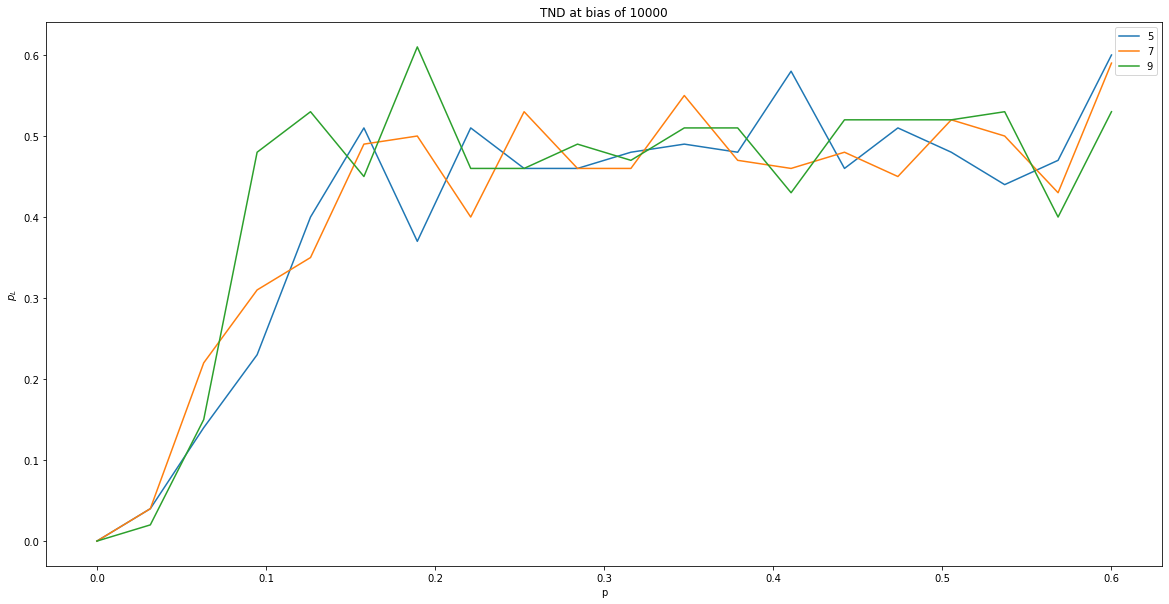

In [148]:
from itertools import cycle
plt.figure(figsize=(20,10))
lines = ["-",":","--","-."]
linecycler = cycle(lines)
plt.title('TND at bias of 10000')
for codesize_index,code in enumerate(codes):
    plt.plot(error_probabilities, pL_list[codesize_index])
plt.xlabel('p')
plt.ylabel('$p_L$')
plt.legend([5,7,9]) 

In [113]:
error_probabilities[12]

0.37894736842105264

In [48]:
for code_index,code in enumerate(codes):
    print(code_index,code)

0 PlanarCode(3, 3)
1 PlanarCode(5, 5)
2 PlanarCode(7, 7)


In [142]:
print(pL_list)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Prepare data for plotting


In [3]:
# prepare code to x,y map and print
code_to_xys = {}
for run in data:
    xys = code_to_xys.setdefault(run['code'], [])
    xys.append((error_probabilities,pL_list))
print('\n'.join('{}: {}'.format(k, v) for k, v in code_to_xys.items()))

Planar 3x3: [(0.0, 0.0), (0.020376923076923077, 0.0085), (0.04244615384615385, 0.0339), (0.06314615384615385, 0.0713), (0.08421538461538462, 0.1125), (0.10518461538461538, 0.1627), (0.12524615384615387, 0.2042), (0.1468, 0.254), (0.17186923076923077, 0.2956), (0.1902, 0.3364), (0.21196923076923077, 0.3696), (0.23303076923076924, 0.3952), (0.2512615384615385, 0.4136), (0.2741769230769231, 0.4347), (0.2947923076923077, 0.4546), (0.31774615384615384, 0.4721), (0.3381076923076923, 0.4793), (0.35857692307692307, 0.4901), (0.3784692307692308, 0.4911), (0.4005230769230769, 0.4927)]
Planar 5x5: [(0.0, 0.0), (0.021153658536585365, 0.0027), (0.04207073170731707, 0.0142), (0.06267317073170732, 0.0523), (0.08428536585365853, 0.0965), (0.10525365853658536, 0.163), (0.12549024390243904, 0.2215), (0.14862926829268291, 0.2955), (0.1693560975609756, 0.3417), (0.18898536585365852, 0.389), (0.2097243902439024, 0.426), (0.23202195121951216, 0.459), (0.2523170731707317, 0.4671), (0.2725073170731707, 0.4724

### Plot logical failure rate against physical error rate

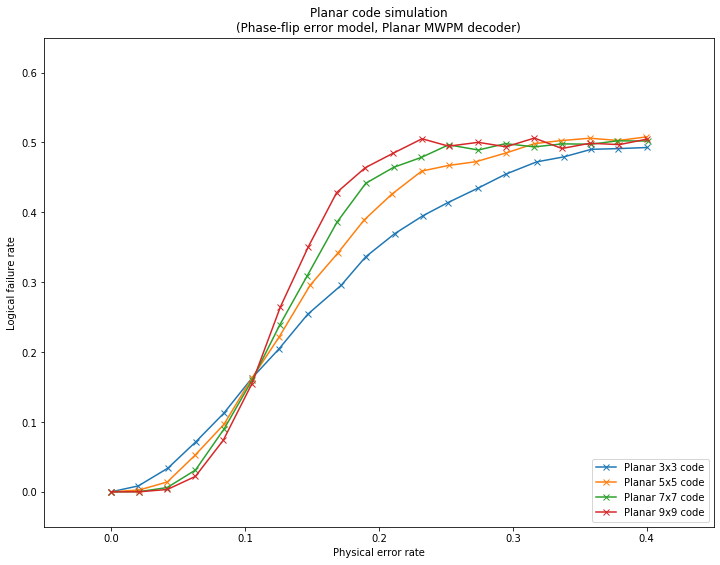

In [4]:
# format plot
fig = plt.figure(1, figsize=(12, 9))
plt.title('Planar code simulation\n({} error model, {} decoder)'.format(error_model.label, decoder.label))
plt.xlabel('Physical error rate')
plt.ylabel('Logical failure rate')
plt.xlim(error_probability_min-0.05, error_probability_max+0.05)
plt.ylim(-0.05, 0.65)
# add data
for code, xys in code_to_xys.items():
    plt.plot(*zip(*xys), 'x-', label='{} code'.format(code))
plt.legend(loc='lower right')
plt.show()

Fig. 1. Logical failure rate as a function of physical error rate for planar stabilizer codes.

Definitions:

* A physical error occurs when the generated error acts non-trivially on a physical qubit.  
  $(\text{physical error rate}) = mean(\text{error weight}) / (\text{number of physical qubits})$.

* A logical failure occurs when the combined action of the generated error and recovery operation acts non-trivially on the codespace, irrespective of the number of logical qubits encoded.  
  $(\text{logical failure rate}) = (\text{number of logical failures}) / (\text{number of runs})$.